In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
training_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\unnat\Downloads\Food_Veg_Data\train",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


In [3]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\unnat\Downloads\Food_Veg_Data\validation",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


In [4]:
cnn = tf.keras.models.Sequential()

In [5]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

C:\Users\unnat\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [6]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [8]:
cnn.add(tf.keras.layers.Dropout(0.25))

In [9]:
cnn.add(tf.keras.layers.Flatten())

In [10]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

In [11]:
cnn.add(tf.keras.layers.Dense(units=256,activation='relu'))

In [12]:
cnn.add(tf.keras.layers.Dropout(0.5)) #To avoid overfitting

In [13]:
#Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

In [14]:
cnn.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 64, 64, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 62, 62, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 31, 31, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 29, 29, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       6,423,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 36)                  │           9,252 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,629,188 (25.29 MB)

 Trainable params: 6,629,188 (25.29 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=32)

Epoch 1/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 139s 1s/step - accuracy: 0.0216 - loss: 16.1424 - val_accuracy: 0.0285 - val_loss: 3.5834
Epoch 2/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 116s 1s/step - accuracy: 0.0283 - loss: 3.5815 - val_accuracy: 0.0342 - val_loss: 3.5824
Epoch 3/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.0340 - loss: 3.5747 - val_accuracy: 0.0342 - val_loss: 3.5718
Epoch 4/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.0342 - loss: 3.5671 - val_accuracy: 0.0798 - val_loss: 3.5012
Epoch 5/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.0426 - loss: 3.5479 - val_accuracy: 0.0798 - val_loss: 3.4663
Epoch 6/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.0523 - loss: 3.5140 - val_accuracy: 0.1054 - val_loss: 3.3482
Epoch 7/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.0698 - loss: 3.4864 - val_accuracy: 0.1339 - val_loss: 3.2559
Epoch 8/32
98/98 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.0707 - loss: 3.4370 - val_accuracy: 0.1225 - 

In [17]:
#Training set Accuracy
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

98/98 ━━━━━━━━━━━━━━━━━━━━ 77s 736ms/step - accuracy: 0.9911 - loss: 0.0394
Training accuracy: 0.9913322925567627


In [18]:
#Validation set Accuracy
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 283ms/step - accuracy: 0.9596 - loss: 0.2579
Validation accuracy: 0.9572649598121643


In [19]:
cnn.save('trained_model.h5')

In [20]:
training_history.history #Return Dictionary of history

{'accuracy': [0.024398073554039,
  0.03242375701665878,
  0.03146067261695862,
  0.04077046364545822,
  0.04622792825102806,
  0.05489566549658775,
  0.07287319749593735,
  0.08057785034179688,
  0.09823434799909592,
  0.16051363945007324,
  0.2375601977109909,
  0.3194221556186676,
  0.4035313129425049,
  0.5197432041168213,
  0.6028892397880554,
  0.6654895544052124,
  0.7367576360702515,
  0.7765650153160095,
  0.8057785034179688,
  0.8613162040710449,
  0.8863563537597656,
  0.8853932619094849,
  0.902407705783844,
  0.9133226275444031,
  0.9171749353408813,
  0.9149277806282043,
  0.9088282585144043,
  0.9316211938858032,
  0.9418940544128418,
  0.9479935765266418,
  0.9434992074966431,
  0.934831440448761],
 'loss': [6.764538288116455,
  3.5814526081085205,
  3.5749123096466064,
  3.5634026527404785,
  3.543431282043457,
  3.5153868198394775,
  3.4604036808013916,
  3.411311626434326,
  3.3582749366760254,
  3.140087366104126,
  2.7948265075683594,
  2.48214054107666,
  2.1354215

In [21]:
#Recording History in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [26]:
print(training_history.history.keys())    
#dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


In [27]:
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))
     

Validation set Accuracy: 95.72649598121643 %


In [28]:
#training_history.history['accuracy']

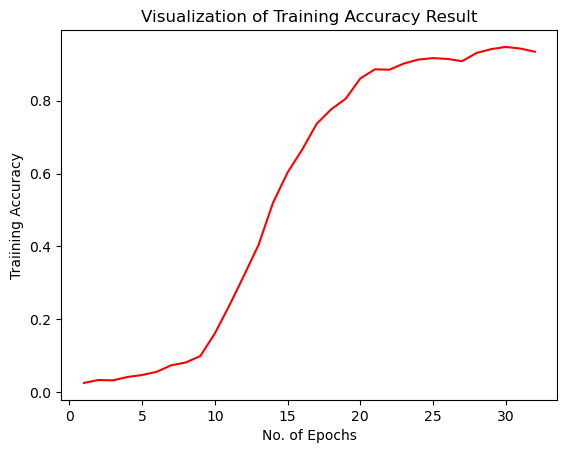

In [29]:
epochs = [i for i in range(1,33)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('No. of Epochs')
plt.ylabel('Traiining Accuracy')
plt.title('Visualization of Training Accuracy Result')
plt.show()

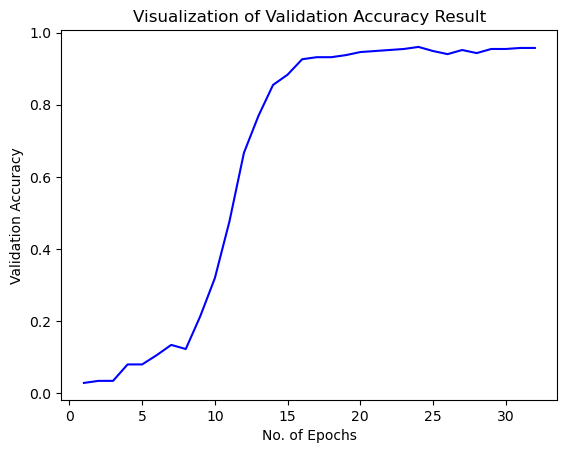

In [30]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('No. of Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()

In [32]:
test_set = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\unnat\Downloads\Food_Veg_Data\test",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 359 files belonging to 36 classes.


In [33]:
test_loss,test_acc = cnn.evaluate(test_set)
print('Test accuracy:', test_acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 12s 309ms/step - accuracy: 0.9651 - loss: 0.3284
Test accuracy: 0.9582172632217407
